# 第7章: 単語ベクトル
単語の意味を実ベクトルで表現する単語ベクトル（単語埋め込み）に関して，以下の処理を行うプログラムを作成せよ．

## 60. 単語ベクトルの読み込みと表示
***
Google Newsデータセット（約1,000億単語）での学習済み単語ベクトル（300万単語・フレーズ，300次元）をダウンロードし，”United States”の単語ベクトルを表示せよ．ただし，”United States”は内部的には”United_States”と表現されていることに注意せよ．

https://drive.google.com/uc?id=0B7XkCwpI5KDYNlNUTTlSS21pQmM

もし

Access denied with the following error: Too many users have viewed or downloaded this file recently. Please try accessing the file again later. If the file you are trying to access is particularly large or is shared with many people, it may take up to 24 hours to be able to view or download the file. If you still can't access a file after 24 hours, contact your domain administrator.

みたいなエラーが出たら、下のリンクを使ってください。

https://drive.google.com/uc?id=1b5P1KufeAH4WfDZDFUGr1Y2QzHJQxvTw

In [1]:
import gdown

# Google Newsデータセット（約1,000億単語）の学習済み単語ベクトル（300万単語・フレーズ，300次元）をダウンロード
# 学習済み単語ベクトルのダウンロード
url = 'https://drive.google.com/uc?id=0B7XkCwpI5KDYNlNUTTlSS21pQmM'
output = 'GoogleNews-vectors-negative300.bin.gz'
gdown.download(url, output, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=0B7XkCwpI5KDYNlNUTTlSS21pQmM
From (redirected): https://drive.google.com/uc?id=0B7XkCwpI5KDYNlNUTTlSS21pQmM&confirm=t&uuid=7f3b3912-d604-4c1d-9fcc-738550444747
To: /Users/ishitoyayuri/lab-dev/nlp100/GoogleNews-vectors-negative300.bin.gz
100%|██████████████████████████████████████| 1.65G/1.65G [00:43<00:00, 38.3MB/s]


'GoogleNews-vectors-negative300.bin.gz'

今回は gensim というモジュールを使って学習済み単語埋め込みモデルを扱う。

https://radimrehurek.com/gensim/models/keyedvectors.html

In [2]:
# gensim : 最新の統計的機械学習を使用した教師なしトピックモデリングと自然言語処理のためのオープンソースライブラリ
# 今回は gensim を使って学習ずみ単語ベクトルを扱う
from gensim.models import KeyedVectors

# 学習済みモデルのロード
model = KeyedVectors.load_word2vec_format('./GoogleNews-vectors-negative300.bin.gz', binary=True)

In [ ]:
# ”United States”の単語ベクトルを表示
model['United_States']

array([-3.61328125e-02, -4.83398438e-02,  2.35351562e-01,  1.74804688e-01,
       -1.46484375e-01, -7.42187500e-02, -1.01562500e-01, -7.71484375e-02,
        1.09375000e-01, -5.71289062e-02, -1.48437500e-01, -6.00585938e-02,
        1.74804688e-01, -7.71484375e-02,  2.58789062e-02, -7.66601562e-02,
       -3.80859375e-02,  1.35742188e-01,  3.75976562e-02, -4.19921875e-02,
       -3.56445312e-02,  5.34667969e-02,  3.68118286e-04, -1.66992188e-01,
       -1.17187500e-01,  1.41601562e-01, -1.69921875e-01, -6.49414062e-02,
       -1.66992188e-01,  1.00585938e-01,  1.15722656e-01, -2.18750000e-01,
       -9.86328125e-02, -2.56347656e-02,  1.23046875e-01, -3.54003906e-02,
       -1.58203125e-01, -1.60156250e-01,  2.94189453e-02,  8.15429688e-02,
        6.88476562e-02,  1.87500000e-01,  6.49414062e-02,  1.15234375e-01,
       -2.27050781e-02,  3.32031250e-01, -3.27148438e-02,  1.77734375e-01,
       -2.08007812e-01,  4.54101562e-02, -1.23901367e-02,  1.19628906e-01,
        7.44628906e-03, -

In [4]:
# 単語ベクトルのサイズ
model['United_States'].shape

(300,)

## 61. 単語の類似度
***
“United States”と”U.S.”のコサイン類似度を計算せよ．

In [5]:
model.similarity('United_States', 'U.S.')

0.73107743

１に近い値となったので、二つの単語の間には類似性があると言える

## 62. 類似度の高い単語10件
***
“United States”とコサイン類似度が高い10語と，その類似度を出力せよ．

In [6]:
model.most_similar('United_States', topn=10)

[('Unites_States', 0.7877248525619507),
 ('Untied_States', 0.7541370391845703),
 ('United_Sates', 0.7400725483894348),
 ('U.S.', 0.7310774326324463),
 ('theUnited_States', 0.6404393911361694),
 ('America', 0.6178410053253174),
 ('UnitedStates', 0.6167312264442444),
 ('Europe', 0.6132988929748535),
 ('countries', 0.6044804453849792),
 ('Canada', 0.6019070148468018)]

タイプミスの方が類似度が高いという結果になった

## 63. 加法構成性によるアナロジー
***
“Spain”の単語ベクトルから”Madrid”のベクトルを引き，”Athens”のベクトルを足したベクトルを計算し，そのベクトルと類似度の高い10語とその類似度を出力せよ．

In [7]:
model.most_similar(positive=['Spain', 'Athens'], negative=['Madrid'], topn=10)

[('Greece', 0.6898480653762817),
 ('Aristeidis_Grigoriadis', 0.560684859752655),
 ('Ioannis_Drymonakos', 0.555290937423706),
 ('Greeks', 0.5450686812400818),
 ('Ioannis_Christou', 0.5400862693786621),
 ('Hrysopiyi_Devetzi', 0.5248445272445679),
 ('Heraklio', 0.5207759141921997),
 ('Athens_Greece', 0.5168809294700623),
 ('Lithuania', 0.5166866183280945),
 ('Iraklion', 0.5146791934967041)]

スペインの首都：マドリード

ギリシャの首都：アテネ

という関係性が単語ベクトルで表現できた！

spain - madrid + athenes = greece

他にもいろいろ試してみましょう！

In [8]:
# よく例として挙げられるもの
# king - man + woman = ???
model.most_similar(positive=['king', 'woman'], negative=['man'], topn=10)

[('queen', 0.7118192911148071),
 ('monarch', 0.6189674735069275),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321243286133),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.5181134343147278),
 ('sultan', 0.5098593235015869),
 ('monarchy', 0.5087411403656006)]

In [9]:
# cat - kitten + dog = ???
model.most_similar(positive=['cat', 'dog'], negative=['kitten'], topn=10)

[('dogs', 0.7362095713615417),
 ('cats', 0.6359845995903015),
 ('beagle', 0.6304870247840881),
 ('pet', 0.6289805173873901),
 ('canines', 0.6106489300727844),
 ('canine', 0.6095181703567505),
 ('pooch', 0.603018045425415),
 ('pit_bull', 0.6011431813240051),
 ('Labrador_retriever', 0.5989587306976318),
 ('Dog', 0.591141939163208)]

In [10]:
# go - went + ate = ???
model.most_similar(positive=['go', 'ate'], negative=['went'], topn=10)

[('eat', 0.7640841007232666),
 ('eaten', 0.6376364827156067),
 ('eating', 0.5695255994796753),
 ('eats', 0.540438711643219),
 ('munch', 0.5298828482627869),
 ('devour', 0.4996225833892822),
 ('eat_fatty_foods', 0.49500104784965515),
 ('consume', 0.4949479103088379),
 ('veggie_trays', 0.48969343304634094),
 ('gobble', 0.48930463194847107)]

## 64. アナロジーデータでの実験
***
単語アナロジーの評価データをダウンロードし，vec(2列目の単語) - vec(1列目の単語) + vec(3列目の単語)を計算し，そのベクトルと類似度が最も高い単語と，その類似度を求めよ．求めた単語と類似度は，各事例の末尾に追記せよ．

http://download.tensorflow.org/data/questions-words.txt

***
目的は、ダウンロードした　google news データセットの単語埋め込みの精度の評価をするための準備。

In [11]:
# 単語アナロジーの評価データダウンロード
!wget http://download.tensorflow.org/data/questions-words.txt

--2024-05-15 13:34:50--  http://download.tensorflow.org/data/questions-words.txt
Resolving download.tensorflow.org (download.tensorflow.org)... 2404:6800:4004:811::201b, 2404:6800:4004:812::201b, 2404:6800:4004:81e::201b, ...
Connecting to download.tensorflow.org (download.tensorflow.org)|2404:6800:4004:811::201b|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 603955 (590K) [text/plain]
Saving to: ‘questions-words.txt’

questions-words.txt 100%[===================>] 589.80K  --.-KB/s    in 0.04s   

2024-05-15 13:34:51 (14.1 MB/s) - ‘questions-words.txt’ saved [603955/603955]



In [15]:
# 先頭10行をみてみる
!head -10 questions-words.txt

: capital-common-countries
Athens Greece Baghdad Iraq
Athens Greece Bangkok Thailand
Athens Greece Beijing China
Athens Greece Berlin Germany
Athens Greece Bern Switzerland
Athens Greece Cairo Egypt
Athens Greece Canberra Australia
Athens Greece Hanoi Vietnam
Athens Greece Havana Cuba


***
14つのセクションに分かれている。

1. capital-common-countries
2. capital-world
3. currency
4. city-in-state
5. family
6. gram1-adjective-to-adverb
7. gram2-opposite
8. gram3-comparative
9. gram4-superlative
10. gram5-present-participle
11. gram6-nationality-adjective
12. gram7-past-tense
13. gram8-plural
14. gram9-plural-verbs

それぞれ４つの単語が並んでいて、１つ目と２つ目の単語と、３つ目と４つ目の単語の関係性が同じ。
***






vec(2列目の単語) - vec(1列目の単語) + vec(3列目の単語)を計算し，そのベクトルと類似度が最も高い単語と，その類似度を求めよ．求めた単語と類似度は，各事例の末尾に追記せよ．
***

注意！下のセルは実行にとても時間がかかりますので、今回は実行しない方がいいです！

In [ ]:
with open('./questions-words.txt', 'r') as f1, open('./questions-words-add.txt', 'w') as f2: # ファイルf1からデータを読み込みつつ、ファイルf2にデータを書き込む
  for row in f1:  # f1から1行ずつ読込む
    row = row.strip().split(' ') # 各列を単語の配列に変換

    # カテゴリの列
    if row[0] == ':':
      category = row[1]

    # 単語列
    else:
      word, cos = model.most_similar(positive=[row[1], row[2]], negative=[row[0]], topn=1)[0] # vec(2列目の単語) - vec(1列目の単語) + vec(3列目の単語) の単語を類似度を求める
      f2.write(' '.join([category] + row + [word, str(cos)+'\n'])) # 結果をf2に書き込む

類似しているベクトルを求めるのにとても時間がかかります。（30分はゆうにかかる・・・）
ですので、今回は作成して得られるはずのファイルを共有させてください。

https://drive.google.com/uc?id=1Mp9ujki9kevs0BeKULjxXduS5EhUpdKu'

In [16]:
# 上のコードを実行すると得られるファイルをダウンロード
url = 'https://drive.google.com/uc?id=1Mp9ujki9kevs0BeKULjxXduS5EhUpdKu'
output = 'questions-words-add.txt'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1Mp9ujki9kevs0BeKULjxXduS5EhUpdKu
To: /Users/ishitoyayuri/lab-dev/nlp100/questions-words-add.txt
100%|██████████████████████████████████████| 1.47M/1.47M [00:00<00:00, 20.5MB/s]


'questions-words-add.txt'

In [17]:
# 書き込んだファイルを確認
!head -10 questions-words-add.txt

capital-common-countries Athens Greece Baghdad Iraq Iraqi 0.6351870894432068
capital-common-countries Athens Greece Bangkok Thailand Thailand 0.7137669920921326
capital-common-countries Athens Greece Beijing China China 0.7235777378082275
capital-common-countries Athens Greece Berlin Germany Germany 0.6734622716903687
capital-common-countries Athens Greece Bern Switzerland Switzerland 0.4919748902320862
capital-common-countries Athens Greece Cairo Egypt Egypt 0.7527809739112854
capital-common-countries Athens Greece Canberra Australia Australia 0.583732545375824
capital-common-countries Athens Greece Hanoi Vietnam Viet_Nam 0.6276341676712036
capital-common-countries Athens Greece Havana Cuba Cuba 0.6460990905761719
capital-common-countries Athens Greece Helsinki Finland Finland 0.68999844789505


## 65. アナロジータスクでの正解率
***
64の実行結果を用い，意味的アナロジー（semantic analogy）と文法的アナロジー（syntactic analogy）の正解率を測定せよ．

意味的アナロジー
1. capital-common-countries
(ex. Beijing China Tokyo Japan)
2. capital-world
3. currency
(ex. USA dollar Japan yen)
4. city-in-state
(ex. Huntsville Alabama Miami Florida)
5. family
(ex. boy girl brother sister)

文法的アナロジー
6. gram1-adjective-to-adverb
(ex. amazing amazingly lucky luckily)
7. gram2-opposite
(ex. aware unaware certain uncertain)
8. gram3-comparative
(ex. bad worse big bigger)
9. gram4-superlative
(ex. bad worst big biggest)
10. gram5-present-participle
(ex. dance dancing fly flying)
11. gram6-nationality-adjective
(ex. China Chinese Japan Japanese)
12. gram7-past-tense
(ex. dancing danced jumping jumped)
13. gram8-plural
(ex. banana bananas bird birds)
14. gram9-plural-verbs
(ex. decrease decreases describe describes)

***






64. にて作成したファイルの中身は

・・・

カテゴリ　単語１　単語２　単語３　単語４　求めた単語　類似度

・・・

「単語４（正解単語）と求めた単語の一致度から正解率を求めよ」という問題！

In [18]:
with open('questions-words-add.txt', 'r') as f: # 64で出力したファイルを読み込む
    sem_num = 0 # 意味的アナロジーの行数
    sem_cor = 0 # 意味的アナロジーの正解数
    syn_num = 0 # 文法的アナロジーの行数
    syn_cor = 0 # 文法的アナロジーの正解数

    for row in f:
        row = row.strip().split(' ') # [カテゴリ、単語１、単語２、単語３、単語４、求めた単語、類似度]

        # 文法的アナロジー
        if row[0].startswith('gram'):
          syn_num+=1
          if row[4] == row[5]: #　単語４（正解単語）と求めた単語が同じか
            syn_cor += 1

        # 意味的アナロジー
        else:
            sem_num += 1
            if row[4] == row[5]:
              sem_cor += 1

print('意味的アナロジー正解率 : ', sem_cor/sem_num)
print('文法的アナロジー正解率 : ', syn_cor/syn_num)

意味的アナロジー正解率 :  0.7308602999210734
文法的アナロジー正解率 :  0.7400468384074942


微妙！

## 66. WordSimilarity-353での評価
***
The WordSimilarity-353 Test Collectionの評価データをダウンロードし，単語ベクトルにより計算される類似度のランキングと，人間の類似度判定のランキングの間のスピアマン相関係数を計算せよ．

http://www.gabrilovich.com/resources/data/wordsim353/wordsim353.html

The WordSimilarity-353 Test Collection：英単語のペアと人間が割り当てた類似度判定のデータセット

set1 : 153の単語ペアと13人の被験者によって割り当てられた類似度スコア

set2 : 200の単語ペアと16人の被験者によって割り当てられた類似度スコア

combined : set1 と set2 を連結したもの。353個すべての単語ペアとそれらの平均類似度スコア


ぺあの単語の類似度を０（全く関連がない）から１０（非常に関連がある）までの尺度で推定

In [19]:
# The WordSimilarity-353 Test Collectionの評価データをダウンロード
!wget http://www.gabrilovich.com/resources/data/wordsim353/wordsim353.zip

--2024-05-15 13:36:46--  http://www.gabrilovich.com/resources/data/wordsim353/wordsim353.zip
Resolving www.gabrilovich.com (www.gabrilovich.com)... 173.236.137.139
Connecting to www.gabrilovich.com (www.gabrilovich.com)|173.236.137.139|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://gabrilovich.com/resources/data/wordsim353/wordsim353.zip [following]
--2024-05-15 13:36:48--  https://gabrilovich.com/resources/data/wordsim353/wordsim353.zip
Resolving gabrilovich.com (gabrilovich.com)... 173.236.137.139
Connecting to gabrilovich.com (gabrilovich.com)|173.236.137.139|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23257 (23K) [application/zip]
Saving to: ‘wordsim353.zip’

wordsim353.zip      100%[===================>]  22.71K   130KB/s    in 0.2s    

2024-05-15 13:36:49 (130 KB/s) - ‘wordsim353.zip’ saved [23257/23257]



In [20]:
# データを解凍
!unzip wordsim353.zip

Archive:  wordsim353.zip
  inflating: combined.csv            
  inflating: set1.csv                
  inflating: set2.csv                
  inflating: combined.tab            
  inflating: set1.tab                
  inflating: set2.tab                
  inflating: instructions.txt        


In [21]:
# 先頭10行をみてみる
!head -20 set1.csv

「単語１、単語２、平均判定類似度、一人目の判定類似度、・・・、１３人めの判定類似度」
となっている。

In [22]:
# 先頭10行をみてみる
!head -20 set2.csv

In [23]:
# 先頭10行をみてみる
!head -20 combined.csv

どれを使ってもできそうですけど、今回は combined.csv を使いましょう！

単語の埋め込みによる単語のペアのコサイン類似度を求める

In [24]:
hs = [] # 人間による類似度リスト
wvs = [] # 単語ベクトルによる類似度

with open('./combined.csv', 'r') as f:
  next(f) # 一行目はヘッダーですので、読み飛ばす

  for row in f:  # 1行ずつ読込み、単語ベクトルと類似度を計算
    row = row.strip().split(',')
    cos = model.similarity(row[0], row[1]) # コサイン類似度

    hs.append(float(row[2]))
    wvs.append(cos)

In [25]:
# 確認
print(hs[:5])
print('*'*5)
print(wvs[:5])

[6.77, 7.35, 10.0, 7.46, 7.62]
*****
[0.2639377, 0.5172962, 0.99999994, 0.3634626, 0.39639163]


scipy.stats.spearmanr　を使ってスピアマン相関係数を求めてみる

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html

In [26]:
from scipy.stats import spearmanr

# スピアマン相関係数を求める
res = spearmanr(hs, wvs)

print(f'スピアマン相関係数: {res.statistic:.5f}')

スピアマン相関係数: 0.70002


まあ良い？

##67. k-meansクラスタリング
***
国名に関する単語ベクトルを抽出し，k-meansクラスタリングをクラスタ数k=5として実行せよ．

64 で作った question-words-add.txt から、国名を抽出する。

使えそうなカテゴリ
* capital-common-countries (ex. Beijing China Tokyo Japan)
* capital-world
* currency (ex. USA dollar Japan yen)
* gram6-nationality-adjective (ex. China Chinese Japan Japanese)

In [27]:
# 国名抽出
countries = set() # 要素が重複しないよう

with open('./questions-words-add.txt') as f:
  for row in f:
    row = row.strip().split(' ')

    if row[0] in ['capital-common-countries', 'capital-world']:
      countries.add(row[2])
      countries.add(row[4])

    elif row[0] in ['currency', 'gram6-nationality-adjective']:
      countries.add(row[1])
      countries.add(row[3])

countries = list(countries) # リストに変換

In [28]:
# 国名確認
countries[:5]

['Mauritania', 'Oman', 'Gabon', 'Malta', 'Libya']

In [29]:
# 単語ベクトル抽出
countries_vec = [model[country] for country in countries]

#print(countries_vec[0])

sklearn.cluster.KMeans を使ってk-meansクラスタリングを行う

In [30]:
from sklearn.cluster import KMeans

# k-meansクラスタリング
kmeans = KMeans(n_clusters=5) # クラスタ数=5
kmeans.fit(countries_vec)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [ ]:
import numpy as np

# 結果
for i in range(5):
    cluster = np.where(kmeans.labels_ == i)[0]
    print('cluster', i)
    print(', '.join([countries[k] for k in cluster]))

cluster 0
Montenegro, Slovenia, Georgia, Albania, Uzbekistan, Ukraine, Latvia, Lithuania, Cyprus, Russia, Poland, Croatia, Turkey, Kazakhstan, Moldova, Tajikistan, Greece, Kyrgyzstan, Azerbaijan, Serbia, Bulgaria, Macedonia, Estonia, Hungary, Slovakia, Belarus, Romania, Armenia, Turkmenistan
cluster 1
Jamaica, Suriname, Mexico, Dominica, Argentina, Nicaragua, Chile, Uruguay, Honduras, Belize, Peru, Colombia, Brazil, Ecuador, Bahamas, Cuba, Venezuela, Guyana
cluster 2
Ghana, Liberia, Madagascar, Somalia, Gabon, Tunisia, Algeria, Gambia, Niger, Angola, Sudan, Burundi, Guinea, Uganda, Zambia, Nigeria, Mauritania, Rwanda, Senegal, Zimbabwe, Botswana, Malawi, Mozambique, Mali, Libya, Eritrea, Kenya, Namibia
cluster 3
Iran, Nepal, Indonesia, Korea, Egypt, India, Syria, China, Bahrain, Vietnam, Israel, Bangladesh, Cambodia, Qatar, Laos, Fiji, Japan, Taiwan, Bhutan, Malaysia, Iraq, Oman, Lebanon, Pakistan, Jordan, Philippines, Thailand, Afghanistan
cluster 4
Netherlands, Portugal, Tuvalu, Samo

## 68. Ward法によるクラスタリング
***
国名に関する単語ベクトルに対し，Ward法による階層型クラスタリングを実行せよ．さらに，クラスタリング結果をデンドログラムとして可視化せよ．

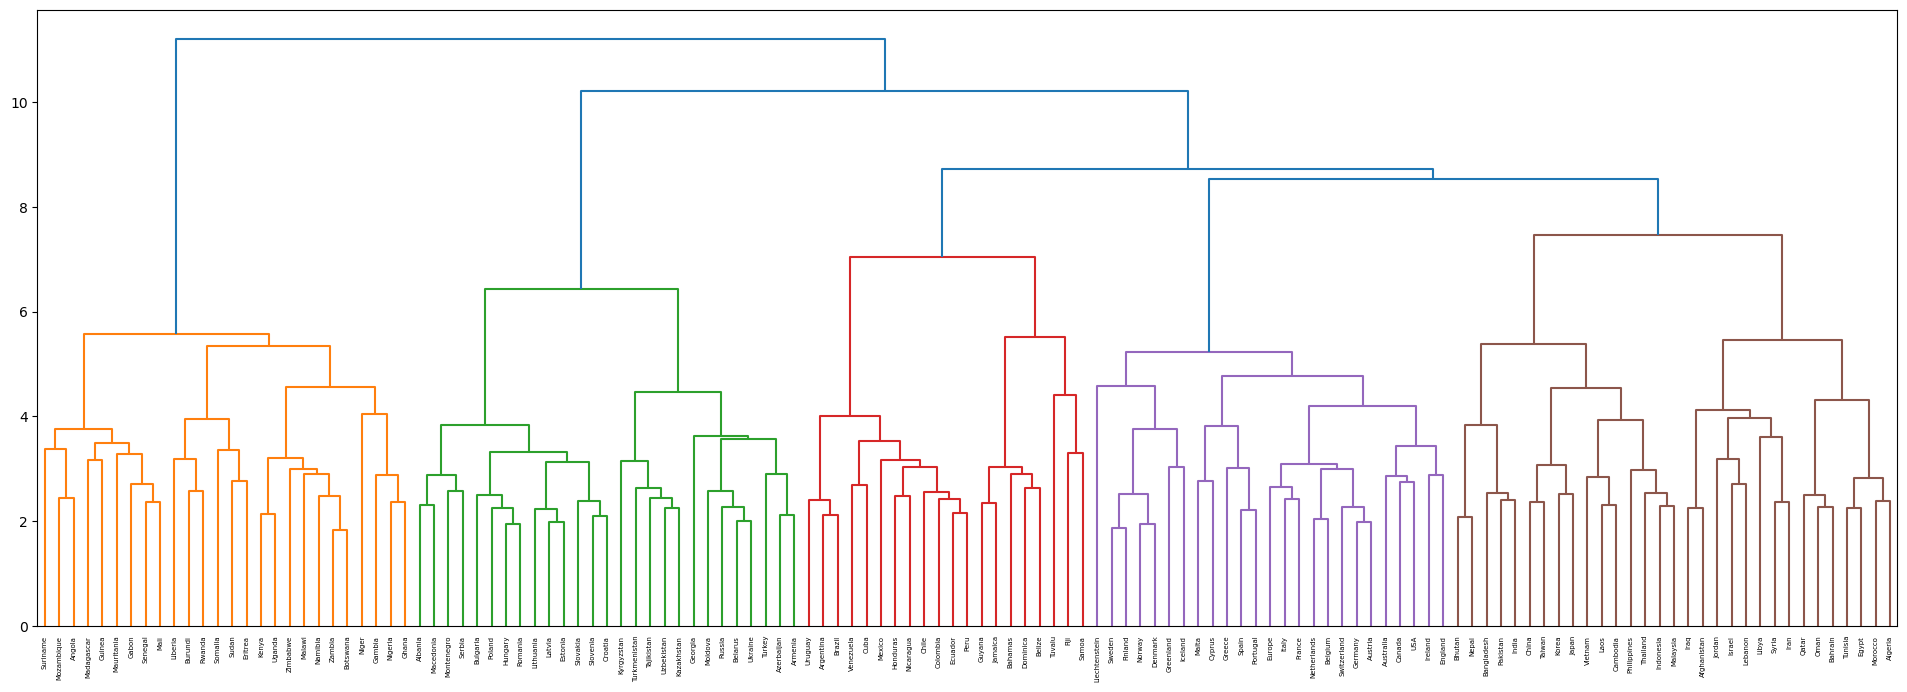

In [31]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(24, 8))
Z = linkage(countries_vec, method='ward')
dendrogram(Z, labels=countries)
plt.show()

## 69. t-SNEによる可視化
***
国名に関する単語ベクトルのベクトル空間をt-SNEで可視化せよ．

In [33]:
pip install cython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 19.5 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [34]:
# bhtsne　ライブラリのインストール
!pip install bhtsne

  Using cached bhtsne-0.1.9.tar.gz (86 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for bhtsne: filename=bhtsne-0.1.9-cp311-cp311-macosx_11_0_arm64.whl size=50396 sha256=17f3c728dd3e6c9f5a9f56ca72c18f73d547403167d8e49027a123bd0bd07064
  Stored in directory: /Users/ishitoyayuri/Library/Caches/pip/wheels/c7/e0/05/ef25429ca93e3ccaddddb1ed036fb692b6b99f078b83937842
Successfully built bhtsne


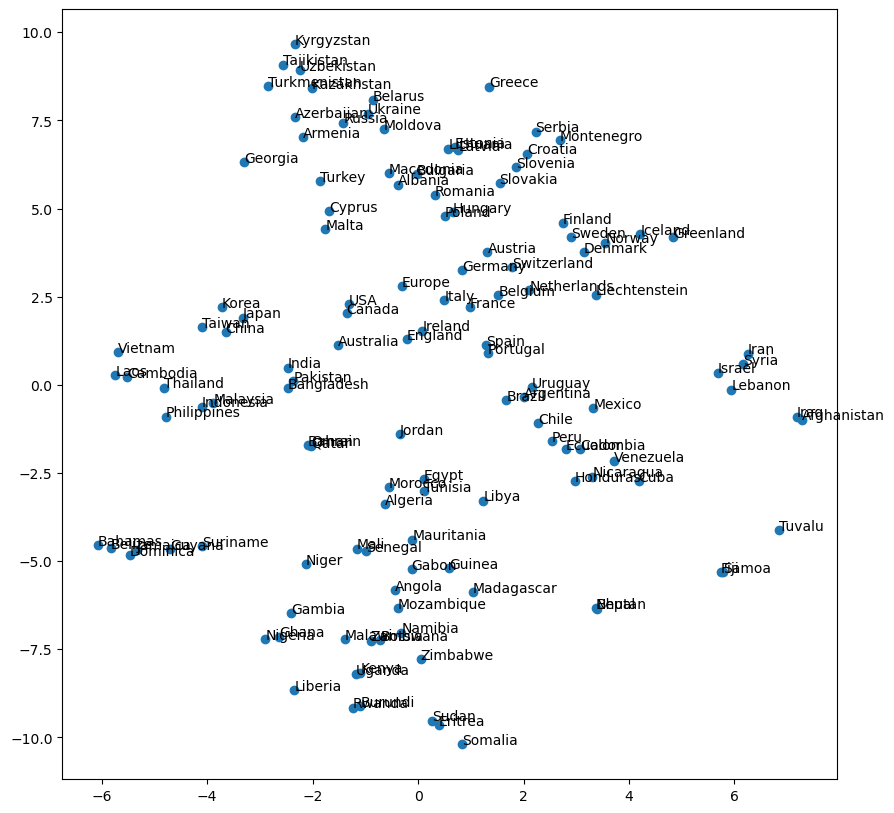

In [36]:
import numpy as np
import bhtsne

embedded = bhtsne.tsne(np.array(countries_vec).astype(np.float64), dimensions=2, rand_seed=123)

plt.figure(figsize=(10, 10))
plt.scatter(np.array(embedded).T[0], np.array(embedded).T[1])
for (x, y), name in zip(embedded, countries):
    plt.annotate(name, (x, y))
plt.show()

７章おしまい。お疲れ様です！

ちょっと休憩がてら遊びましょう！

In [ ]:
vehicles = ["car", "bus", "train", "bicycle", "motorcycle", "boat", "ship", "airplane", "helicopter",
            "subway", "tram", "trolleybus", "scooter", "skateboard", "rollerblades", "rickshaw", "skis",
            "snowboard", "horse", "camel", "elephant", "sailboat", "yacht", "canoe", "kayak",
            "hot air balloon", "parachute", "jet ski", "gondola", "rocket"]

print(vehicles)

['car', 'bus', 'train', 'bicycle', 'motorcycle', 'boat', 'ship', 'airplane', 'helicopter', 'subway', 'tram', 'trolleybus', 'scooter', 'skateboard', 'rollerblades', 'rickshaw', 'skis', 'snowboard', 'horse', 'camel', 'elephant', 'sailboat', 'yacht', 'canoe', 'kayak', 'hot air balloon', 'parachute', 'jet ski', 'gondola', 'rocket']


In [ ]:
music_genres = ["pop", "rock", "hip hop", "jazz", "classical", "electronic", "folk", "reggae", "country",
                "blues", "heavy metal", "punk", "r&b", "soul", "funk", "latin", "world", "indie", "alternative",
                "experimental", "gospel", "dance", "ambient", "reggaeton", "k-pop", "trap", "grunge", "house",
                "techno", "ska"]

print(music_genres)

['pop', 'rock', 'hip hop', 'jazz', 'classical', 'electronic', 'folk', 'reggae', 'country', 'blues', 'heavy metal', 'punk', 'r&b', 'soul', 'funk', 'latin', 'world', 'indie', 'alternative', 'experimental', 'gospel', 'dance', 'ambient', 'reggaeton', 'k-pop', 'trap', 'grunge', 'house', 'techno', 'ska']


In [ ]:
animals = ["elephant", "tiger", "lion", "giraffe", "zebra", "monkey", "kangaroo", "panda", "koala", "cheetah",
           "leopard", "rhinoceros", "hippopotamus", "gazelle", "crocodile", "alligator", "bear", "wolf", "fox",
           "deer", "elephant seal", "seagull", "whale", "dolphin", "shark", "octopus", "jellyfish", "starfish",
           "butterfly", "bee"]

print(animals)

['elephant', 'tiger', 'lion', 'giraffe', 'zebra', 'monkey', 'kangaroo', 'panda', 'koala', 'cheetah', 'leopard', 'rhinoceros', 'hippopotamus', 'gazelle', 'crocodile', 'alligator', 'bear', 'wolf', 'fox', 'deer', 'elephant seal', 'seagull', 'whale', 'dolphin', 'shark', 'octopus', 'jellyfish', 'starfish', 'butterfly', 'bee']


In [ ]:
foods = ["pizza", "hamburger", "sushi", "pasta", "curry", "steak", "chicken", "salad", "ramen", "taco",
         "sandwich", "sashimi", "soup", "grilled cheese", "hot dog", "fried chicken", "sashimi", "rice",
         "noodles", "sashimi", "fish and chips", "spaghetti", "sushi roll", "lobster", "crab", "shrimp",
         "sashimi", "beef stew", "sashimi", "ice cream"]

print(foods)

['pizza', 'hamburger', 'sushi', 'pasta', 'curry', 'steak', 'chicken', 'salad', 'ramen', 'taco', 'sandwich', 'sashimi', 'soup', 'grilled cheese', 'hot dog', 'fried chicken', 'sashimi', 'rice', 'noodles', 'sashimi', 'fish and chips', 'spaghetti', 'sushi roll', 'lobster', 'crab', 'shrimp', 'sashimi', 'beef stew', 'sashimi', 'ice cream']


In [ ]:
subjects = ["mathematics", "history", "biology", "chemistry", "physics", "english", "geography", "computer science",
            "economics", "psychology", "sociology", "philosophy", "art", "music", "physical education", "foreign language",
            "political science", "statistics", "business", "calculus", "literature", "environmental science",
            "social studies", "health", "anthropology", "communication", "law", "astronomy", "religion", "architecture"]

print(subjects)

['mathematics', 'history', 'biology', 'chemistry', 'physics', 'english', 'geography', 'computer science', 'economics', 'psychology', 'sociology', 'philosophy', 'art', 'music', 'physical education', 'foreign language', 'political science', 'statistics', 'business', 'calculus', 'literature', 'environmental science', 'social studies', 'health', 'anthropology', 'communication', 'law', 'astronomy', 'religion', 'architecture']


In [ ]:
colors = ["red", "blue", "green", "yellow", "orange", "purple", "pink", "brown", "black", "white",
          "gray", "turquoise", "maroon", "navy", "teal", "gold", "silver", "violet", "indigo", "magenta",
          "beige", "coral", "olive", "salmon", "peach", "khaki", "lavender", "chartreuse", "fuchsia", "aqua"]

print(colors)

['red', 'blue', 'green', 'yellow', 'orange', 'purple', 'pink', 'brown', 'black', 'white', 'gray', 'turquoise', 'maroon', 'navy', 'teal', 'gold', 'silver', 'violet', 'indigo', 'magenta', 'beige', 'coral', 'olive', 'salmon', 'peach', 'khaki', 'lavender', 'chartreuse', 'fuchsia', 'aqua']


In [ ]:
sports_lst = ["football", "basketball", "soccer", "baseball", "tennis", "golf", "swimming", "volleyball", "hockey", "cricket",
          "rugby", "badminton", "track and field", "cycling", "boxing", "wrestling", "gymnastics", "weightlifting",
          "skiing", "snowboarding", "figure skating", "archery", "rowing", "canoeing", "surfing", "diving", "table tennis",
          "triathlon", "horse racing", "martial arts"]

print(sports_lst)

['football', 'basketball', 'soccer', 'baseball', 'tennis', 'golf', 'swimming', 'volleyball', 'hockey', 'cricket', 'rugby', 'badminton', 'track and field', 'cycling', 'boxing', 'wrestling', 'gymnastics', 'weightlifting', 'skiing', 'snowboarding', 'figure skating', 'archery', 'rowing', 'canoeing', 'surfing', 'diving', 'table tennis', 'triathlon', 'horse racing', 'martial arts']


In [ ]:
alphabet = ["a", "b", "c", "d", "e", "f", "g", "h", "i", "j",
            "k", "l", "m", "n", "o", "p", "q", "r", "s", "t",
            "u", "v", "w", "x", "y", "z", "A", "B", "C", "D",
            "E", "F", "G", "H", "I", "J", "K", "L", "M", "N",
            "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X",
            "Y", "Z"]

print(alphabet)

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


単語のリストから、単語と単語ベクトルの辞書に変換する関数を作る。

In [ ]:
def wordlst2dic(w_lst):
  w2wv_dic={}

  for word in w_lst:
    try:
      w2wv_dic[word]=model[word]
    except KeyError:
      #print("The word {} does not exist in the vocabulary.".format(w))
      pass

  return w2wv_dic

In [ ]:
sports_dic = wordlst2dic(sports_lst)

## 67'. k-meansクラスタリング
***
いろいろなジャンルについて単語ベクトルを抽出し、k-meansクラスタリングをしてみよう！
例えば、乗り物・音楽ジャンル・アルファベット・動物・食べ物・科目・色・スポーツなど。

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5) # クラスタ数=
kmeans.fit(list(sports_dic.values()))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [ ]:
kmeans.labels_

array([2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 0, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1], dtype=int32)

In [ ]:
# 結果
for i in range(5):
    cluster = np.where(kmeans.labels_ == i)[0]
    print('cluster', i)
    print(', '.join([list(sports_dic.keys())[k] for k in cluster]))

cluster 0
surfing, diving
cluster 1
football, basketball, soccer, baseball, tennis, golf, volleyball, hockey, boxing, wrestling
cluster 2
swimming, badminton, gymnastics, weightlifting, archery, rowing, triathlon
cluster 3
cycling, skiing, snowboarding, canoeing
cluster 4
cricket, rugby


## 68'. Ward法によるクラスタリング
***
あるジャンルに関する単語ベクトルに対して、ward法による階層型クラスタリングを実行してみよう！さらにクラスタリング結果をデンドログラムとして可視化して、ぜひ画面共有してください。

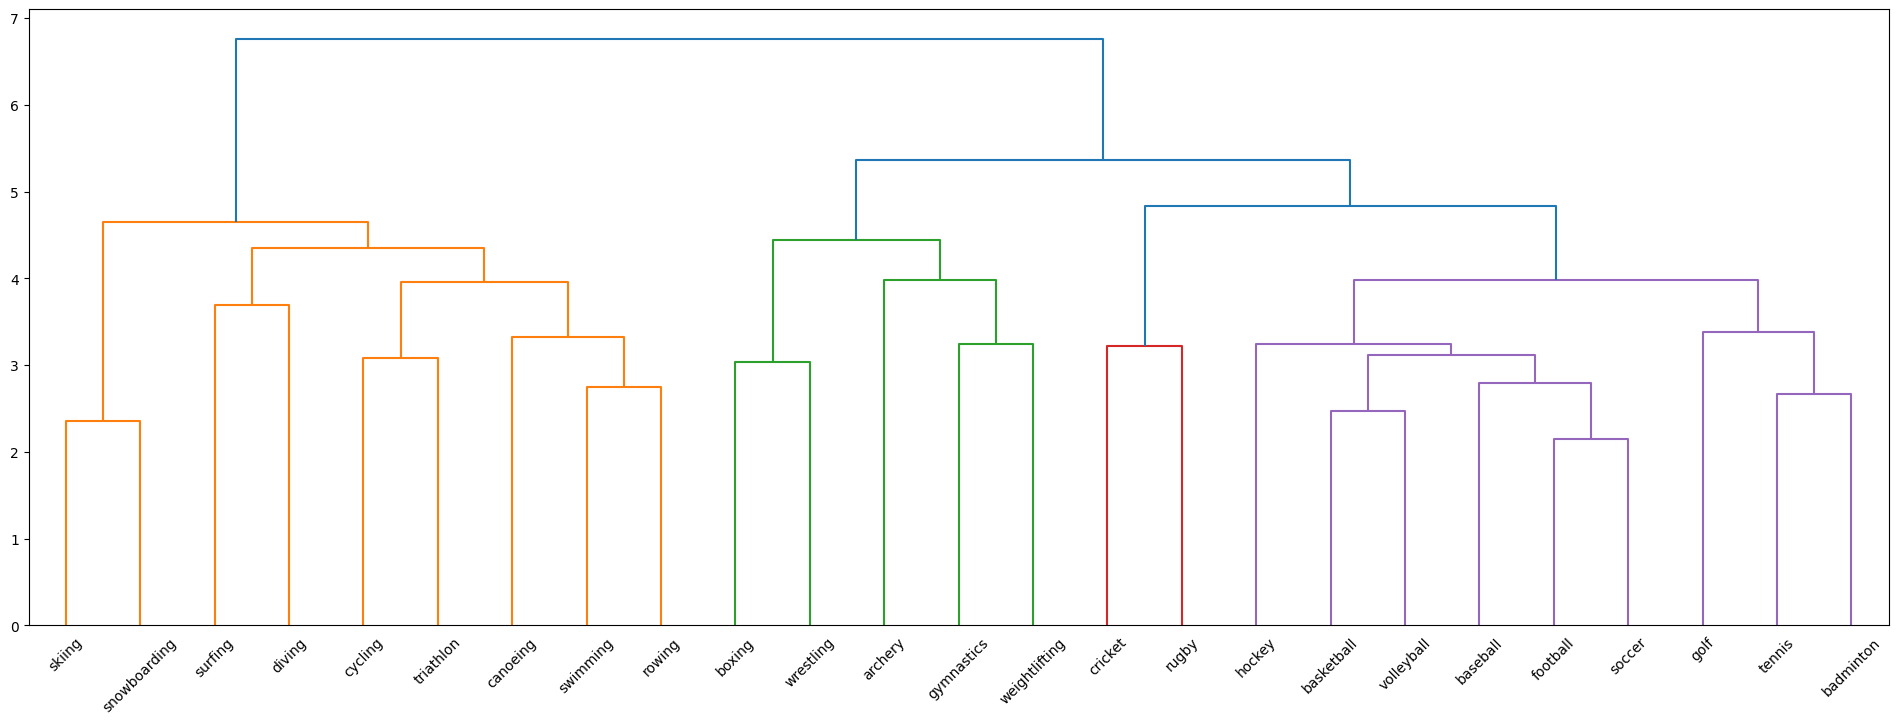

In [ ]:
plt.figure(figsize=(24, 8))
Z = linkage(list(sports_dic.values()), method='ward')
dendrogram(Z, labels=list(sports_dic.keys()))
plt.show()

## 69'. t-SNEによる可視化
***
ベクトル空間上のあるジャンルに関する単語ベクトルを t-SNE で可視化してみよう！

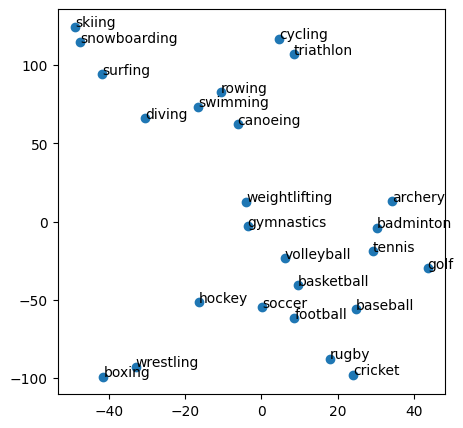

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

Tsne = TSNE(n_components=2, random_state=0, perplexity=3)
reduced_vectors = Tsne.fit_transform(np.array(list(sports_dic.values())))

#print(reduced_vectors)

plt.figure(figsize=(5, 5))
plt.scatter(np.array(reduced_vectors).T[0], np.array(reduced_vectors).T[1])
for i, v in enumerate(reduced_vectors):
  name = list(sports_dic.keys())[i]
  plt.annotate(name, (v[0], v[1]))
plt.show()

## 追加. 文の特徴量
***
次は文の特徴量を出してみよう。

In [ ]:
s1 = 'I ate apples.'
s2 = 'I ate apples and oranges'

各単語ベクトルの平均を文の特徴量と今回は定義してみる。

In [ ]:
import numpy as np

def sentence2vector(sentence):
  sentence = sentence.split(' ')
  assert len(sentence)!=0

  v_sum=np.zeros(300)
  for w in sentence:
    try:
      v_sum = v_sum+model[w]
    except KeyError:
      #print("The word {} does not exist in the vocabulary.".format(w))
      pass

  return v_sum/len(sentence) # numpy のブロードキャスト使用

In [ ]:
s1_v = sentence2vector(s1)
s2_v = sentence2vector(s2)

In [ ]:
s2_v

array([-0.07175293,  0.00784912,  0.02284851,  0.19033203,  0.02658691,
       -0.01207275,  0.10541992, -0.03984375, -0.06834679,  0.21357422,
        0.05569   , -0.17705078, -0.0175415 ,  0.08046875, -0.17363281,
        0.07412109, -0.07988281,  0.07680511, -0.06621094, -0.02075195,
       -0.14243164,  0.10273438,  0.13496094,  0.04267578,  0.02402344,
       -0.11343384, -0.17246094,  0.02976837, -0.09418945,  0.09125977,
       -0.01484375,  0.05268555,  0.01175537,  0.01542969,  0.04793701,
        0.06865234, -0.00775452, -0.14921875,  0.07929688,  0.21699219,
        0.075     , -0.11748047,  0.11947021, -0.10356445,  0.01262207,
       -0.06128998, -0.0960083 ,  0.00838928, -0.13754883,  0.06235352,
       -0.06830444,  0.0559082 ,  0.01987   , -0.03757324, -0.07128906,
       -0.00881348,  0.03100586,  0.03397217, -0.03967285, -0.14902344,
        0.09414063,  0.15192871, -0.08662109,  0.03533936,  0.14106445,
       -0.11020508, -0.14082031, -0.09765625,  0.00454102, -0.05

In [ ]:
model.most_similar(positive=s2_v, negative=s1_v, topn=10)

[('oranges', 0.8196133971214294),
 ('apples', 0.809734046459198),
 ('pears', 0.620904266834259),
 ('peaches', 0.594423234462738),
 ('tangerines', 0.5751066207885742),
 ('grapes', 0.5745070576667786),
 ('melons', 0.5731709599494934),
 ('citrus_fruit', 0.5645973086357117),
 ('cherries', 0.56132572889328),
 ('kumquats', 0.5610014200210571)]